In [5]:
!pip install -U tensorflow-addons
import tensorflow_addons as tfa
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
#import tensorflow_addons as tfa
import os
from tensorflow.keras.preprocessing.image import load_img
#from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import scipy.interpolate
import re
import matplotlib.pyplot as plt
import os

#from imutils import paths
from PIL import ImageFile
import pandas as pd
ImageFile.LOAD_TRUNCATED_IMAGES = True

  Obtaining dependency information for tensorflow-addons from https://files.pythonhosted.org/packages/c0/a0/2bb2edb863555eb87e8ed45ded678138f454743a6ee90e0ee994f00a7147/tensorflow_addons-0.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.0 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.22.0
    Uninstalling tensorflow-addons-0.22.0:
      Successfully uninstalled tensorflow-addons-0.22.0


/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [6]:
dataset_path = os.listdir('/kaggle/input/eye-diseases-classification/dataset')


print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['glaucoma', 'normal', 'diabetic_retinopathy', 'cataract']
Types of classes labels found:  4


In [7]:
import pandas as pd
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('/kaggle/input/eye-diseases-classification/dataset' + '/' +item)
 #print(all_classes)

# Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [8]:
# # Build a dataframe
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

     Labels                                   image
0  glaucoma    dataset_path/glaucoma/1255_right.jpg
1  glaucoma     dataset_path/glaucoma/1482_left.jpg
2  glaucoma  dataset_path/glaucoma/_398_8823411.jpg
3  glaucoma  dataset_path/glaucoma/_309_4110303.jpg
4  glaucoma    dataset_path/glaucoma/_13_697490.jpg
        Labels                                   image
4212  cataract  dataset_path/cataract/_350_7541734.jpg
4213  cataract  dataset_path/cataract/_152_8894820.jpg
4214  cataract     dataset_path/cataract/2105_left.jpg
4215  cataract   dataset_path/cataract/_30_8983681.jpg
4216  cataract     dataset_path/cataract/2207_left.jpg


In [9]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  4217
Labels
diabetic_retinopathy    1098
normal                  1074
cataract                1038
glaucoma                1007
Name: count, dtype: int64


In [10]:
import os
import cv2
from PIL import Image
path = '/kaggle/input/eye-diseases-classification/dataset/'
dataset_path = os.listdir('/kaggle/input/eye-diseases-classification/dataset/')

im_size = 224
images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        #patches = extract_patches_2d(img, patch_size(224, 224), max_patches = 10)
        #img = np.array(img)
        images.append(img)
        labels.append(i)

In [11]:
images = np.array(images)

In [12]:
print(images.shape)

(4217, 224, 224, 3)


In [13]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['glaucoma' 'glaucoma' 'glaucoma' ... 'cataract' 'cataract' 'cataract']
[2 2 2 ... 0 0 0]


In [14]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])


  (0, 2)	1.0
  (1, 2)	1.0
  (2, 2)	1.0
  (3, 2)	1.0
  (4, 2)	1.0
  (0, 2)	1.0
  (1, 2)	1.0
  (2, 2)	1.0
  (3, 2)	1.0
  (4, 2)	1.0
  (5, 2)	1.0
  (6, 2)	1.0
  (7, 2)	1.0
  (8, 2)	1.0
  (9, 2)	1.0
  (10, 2)	1.0
  (11, 2)	1.0
  (12, 2)	1.0
  (13, 2)	1.0
  (14, 2)	1.0
  (15, 2)	1.0
  (16, 2)	1.0
  (17, 2)	1.0
  (18, 2)	1.0
  (19, 2)	1.0
  (20, 2)	1.0
  (21, 2)	1.0
  (22, 2)	1.0
  (23, 2)	1.0
  (24, 2)	1.0
  :	:
  (4157, 0)	1.0
  (4158, 0)	1.0
  (4159, 0)	1.0
  (4160, 0)	1.0
  (4161, 0)	1.0
  (4162, 0)	1.0
  (4163, 0)	1.0
  (4164, 0)	1.0
  (4165, 0)	1.0
  (4166, 0)	1.0
  (4167, 0)	1.0
  (4168, 0)	1.0
  (4169, 0)	1.0
  (4170, 0)	1.0
  (4171, 0)	1.0
  (4172, 0)	1.0
  (4173, 0)	1.0
  (4174, 0)	1.0
  (4175, 0)	1.0
  (4176, 0)	1.0
  (4177, 0)	1.0
  (4178, 0)	1.0
  (4179, 0)	1.0
  (4180, 0)	1.0
  (4181, 0)	1.0


In [15]:
Y = Y.toarray() - 1
Y=(Y-1)
len(Y)


4217

In [16]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=42)






In [17]:
print(f"x_train shape: {train_x.shape} - y_train shape: {train_y.shape}")
print(f"x_test shape: {test_x.shape} - y_test shape: {test_y.shape}")

x_train shape: (3373, 224, 224, 3) - y_train shape: (3373, 4)
x_test shape: (844, 224, 224, 3) - y_test shape: (844, 4)


In [18]:
BUFFER_SIZE = 224
BATCH_SIZE = 256

# AUGMENTATION
IMAGE_SIZE = 224
PATCH_SIZE = 64
NUM_PATCHES = (IMAGE_SIZE // PATCH_SIZE) ** 2

# OPTIMIZER
LEARNING_RATE = 0.001
WEIGHT_DECAY = 0.0001

# TRAINING
EPOCHS = 50

# ARCHITECTURE
LAYER_NORM_EPS = 1e-6
TRANSFORMER_LAYERS = 8
PROJECTION_DIM = 64
NUM_HEADS = 4
TRANSFORMER_UNITS = [
    PROJECTION_DIM * 2,
    PROJECTION_DIM,
]
MLP_HEAD_UNITS = [2048, 1024]

In [19]:
from tensorflow import keras
data_augmentation =keras.Sequential(
    [
        keras.layers.Normalization(),
        keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(factor=0.02),
        keras.layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(train_x)

In [20]:
class ShiftedPatchTokenization(keras.layers.Layer):
    def __init__(
        self,
        image_size=IMAGE_SIZE,
        patch_size=PATCH_SIZE,
        num_patches=NUM_PATCHES,
        projection_dim=PROJECTION_DIM,
        vanilla=False,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.vanilla = vanilla  # Flag to swtich to vanilla patch extractor
        self.image_size = image_size
        self.patch_size = patch_size
        self.half_patch = patch_size // 2
        self.flatten_patches = keras.layers.Reshape((num_patches, -1))
        self.projection = keras.layers.Dense(units=projection_dim)
        self.layer_norm = keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS)

    def crop_shift_pad(self, images, mode):
        # Build the diagonally shifted images
        if mode == "left-up":
            crop_height = self.half_patch
            crop_width = self.half_patch
            shift_height = 0
            shift_width = 0
        elif mode == "left-down":
            crop_height = 0
            crop_width = self.half_patch
            shift_height = self.half_patch
            shift_width = 0
        elif mode == "right-up":
            crop_height = self.half_patch
            crop_width = 0
            shift_height = 0
            shift_width = self.half_patch
        else:
            crop_height = 0
            crop_width = 0
            shift_height = self.half_patch
            shift_width = self.half_patch

        # Crop the shifted images and pad them
        crop = tf.image.crop_to_bounding_box(
            images,
            offset_height=crop_height,
            offset_width=crop_width,
            target_height=self.image_size - self.half_patch,
            target_width=self.image_size - self.half_patch,
        )
        shift_pad = tf.image.pad_to_bounding_box(
            crop,
            offset_height=shift_height,
            offset_width=shift_width,
            target_height=self.image_size,
            target_width=self.image_size,
        )
        return shift_pad

    def call(self, images):
        if not self.vanilla:
            # Concat the shifted images with the original image
            images = tf.concat(
                [
                    images,
                    self.crop_shift_pad(images, mode="left-up"),
                    self.crop_shift_pad(images, mode="left-down"),
                    self.crop_shift_pad(images, mode="right-up"),
                    self.crop_shift_pad(images, mode="right-down"),
                ],
                axis=-1,
            )
        # Patchify the images and flatten it
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        flat_patches = self.flatten_patches(patches)
        if not self.vanilla:
            # Layer normalize the flat patches and linearly project it
            tokens = self.layer_norm(flat_patches)
            tokens = self.projection(tokens)
        else:
            # Linearly project the flat patches
            tokens = self.projection(flat_patches)
        return (tokens, patches)

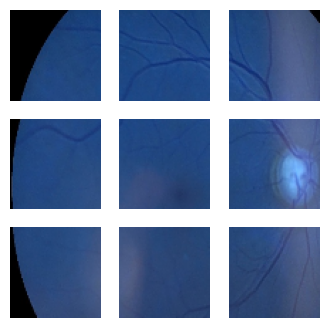

ORIGINAL


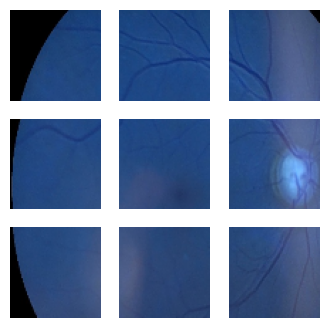

LEFT-UP


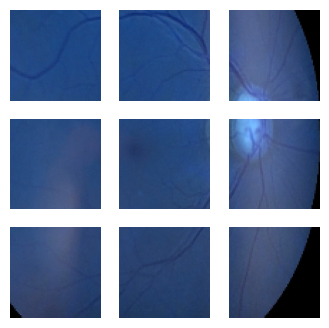

LEFT-DOWN


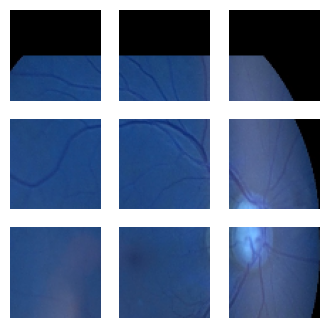

RIGHT-UP


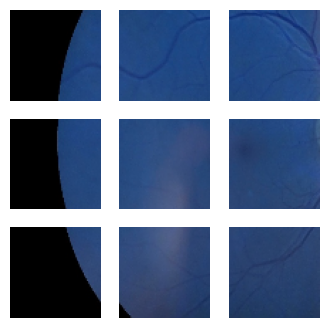

RIGHT-DOWN


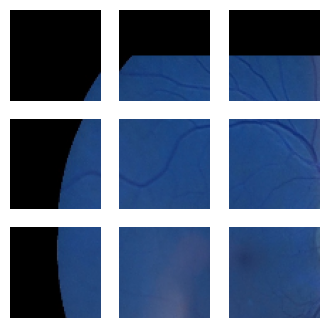

In [21]:
# Get a random image from the training dataset
# and resize the image
image = train_x[np.random.choice(range(train_x.shape[0]))]
resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(IMAGE_SIZE, IMAGE_SIZE)
)

# Vanilla patch maker: This takes an image and divides into
# patches as in the original ViT paper
(token, patch) = ShiftedPatchTokenization(vanilla=True)(resized_image / 255.0)
(token, patch) = (token[0], patch[0])
n = patch.shape[0]
count = 1
plt.figure(figsize=(4, 4))
for row in range(n):
    for col in range(n):
        plt.subplot(n, n, count)
        count = count + 1
        image = tf.reshape(patch[row][col], (PATCH_SIZE, PATCH_SIZE, 3))
        plt.imshow(image)
        plt.axis("off")
plt.show()

# Shifted Patch Tokenization: This layer takes the image, shifts it
# diagonally and then extracts patches from the concatinated images
(token, patch) = ShiftedPatchTokenization(vanilla=False)(resized_image / 255.0)
(token, patch) = (token[0], patch[0])
n = patch.shape[0]
shifted_images = ["ORIGINAL", "LEFT-UP", "LEFT-DOWN", "RIGHT-UP", "RIGHT-DOWN"]
for index, name in enumerate(shifted_images):
    print(name)
    count = 1
    plt.figure(figsize=(4, 4))
    for row in range(n):
        for col in range(n):
            plt.subplot(n, n, count)
            count = count + 1
            image = tf.reshape(patch[row][col], (PATCH_SIZE, PATCH_SIZE, 5 * 3))
            plt.imshow(image[..., 3 * index : 3 * index + 3])
            plt.axis("off")
    plt.show()

In [22]:
class PatchEncoder(layers.Layer):
    def __init__(
        self, num_patches=NUM_PATCHES, projection_dim=PROJECTION_DIM, **kwargs
    ):
        super().__init__(**kwargs)
        self.num_patches = num_patches
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )
        self.positions = tf.range(start=0, limit=self.num_patches, delta=1)

    def call(self, encoded_patches):
        encoded_positions = self.position_embedding(self.positions)
        encoded_patches = encoded_patches + encoded_positions
        return encoded_patches

In [23]:
class MultiHeadAttentionLSA(tf.keras.layers.MultiHeadAttention):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        # The trainable temperature term. The initial value is
        # the square root of the key dimension.
        self.tau = tf.Variable(math.sqrt(float(self._key_dim)), trainable=True)

    def _compute_attention(self, query, key, value, attention_mask=None, training=None):
        query = tf.multiply(query, 1.0 / self.tau)
        attention_scores = tf.einsum(self._dot_product_equation, key, query)
        attention_scores = self._masked_softmax(attention_scores, attention_mask)
        attention_scores_dropout = self._dropout_layer(
            attention_scores, training=training
        )
        attention_output = tf.einsum(
            self._combine_equation, attention_scores_dropout, value
        )
        return attention_output, attention_scores

In [24]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

# Build the diagonal attention mask
diag_attn_mask = 1 - tf.eye(NUM_PATCHES)
diag_attn_mask = tf.cast([diag_attn_mask], dtype=tf.int8)

In [25]:
INPUT_SHAPE = (224, 224, 3)
NUM_CLASSES = 4
def create_vit_classifier(vanilla=False):
    inputs = layers.Input(shape=INPUT_SHAPE)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    (tokens, _) = ShiftedPatchTokenization(vanilla=vanilla)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder()(tokens)

    # Create multiple layers of the Transformer block.
    for _ in range(TRANSFORMER_LAYERS):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        if not vanilla:
            attention_output = MultiHeadAttentionLSA(
                num_heads=NUM_HEADS, key_dim=PROJECTION_DIM, dropout=0.1
            )(x1, x1, attention_mask=diag_attn_mask)
        else:
            attention_output = layers.MultiHeadAttention(
                num_heads=NUM_HEADS, key_dim=PROJECTION_DIM, dropout=0.1
            )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=TRANSFORMER_UNITS, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=MLP_HEAD_UNITS, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(NUM_CLASSES)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

Epoch 1/500
12/12 [==============================] - 13s 203ms/step - loss: 3.0136 - accuracy: 0.2916 - val_loss: 0.8411 - val_accuracy: 0.3935
Epoch 2/500
12/12 [==============================] - 1s 77ms/step - loss: 0.6410 - accuracy: 0.3180 - val_loss: 0.3605 - val_accuracy: 0.4142
Epoch 3/500
12/12 [==============================] - 1s 76ms/step - loss: 0.4707 - accuracy: 0.3137 - val_loss: 0.2801 - val_accuracy: 0.4142
Epoch 4/500
12/12 [==============================] - 1s 77ms/step - loss: 0.3659 - accuracy: 0.3453 - val_loss: 0.2475 - val_accuracy: 0.4379
Epoch 5/500
12/12 [==============================] - 1s 75ms/step - loss: 0.3441 - accuracy: 0.3470 - val_loss: 0.2575 - val_accuracy: 0.4793
Epoch 6/500
12/12 [==============================] - 1s 76ms/step - loss: 0.3151 - accuracy: 0.3483 - val_loss: 0.2318 - val_accuracy: 0.5059
Epoch 7/500
12/12 [==============================] - 1s 76ms/step - loss: 0.2986 - accuracy: 0.3730 - val_loss: 0.2445 - val_accuracy: 0.5296
Epoc

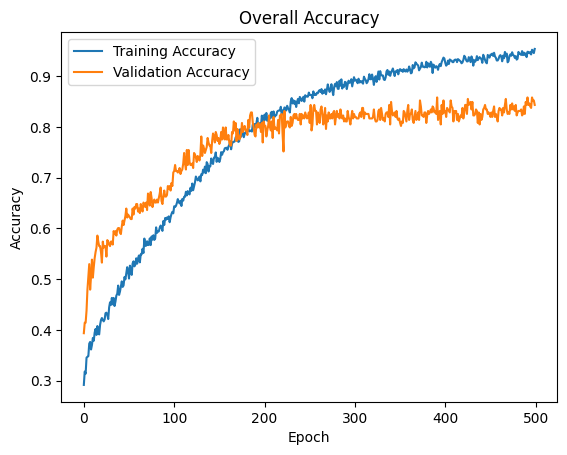

In [27]:
# Some code is taken from:
# https://www.kaggle.com/ashusma/training-rfcx-tensorflow-tpu-effnet-b2.


class WarmUpCosine(keras.optimizers.schedules.LearningRateSchedule):
    def __init__(
        self, learning_rate_base, total_steps, warmup_learning_rate, warmup_steps
    ):
        super(WarmUpCosine, self).__init__()

        self.learning_rate_base = learning_rate_base
        self.total_steps = total_steps
        self.warmup_learning_rate = warmup_learning_rate
        self.warmup_steps = warmup_steps
        self.pi = tf.constant(np.pi)

    def __call__(self, step):
        if self.total_steps < self.warmup_steps:
            raise ValueError("Total_steps must be larger or equal to warmup_steps.")

        cos_annealed_lr = tf.cos(
            self.pi
            * (tf.cast(step, tf.float32) - self.warmup_steps)
            / float(self.total_steps - self.warmup_steps)
        )
        learning_rate = 0.5 * self.learning_rate_base * (1 + cos_annealed_lr)

        if self.warmup_steps > 0:
            if self.learning_rate_base < self.warmup_learning_rate:
                raise ValueError(
                    "Learning_rate_base must be larger or equal to "
                    "warmup_learning_rate."
                )
            slope = (
                self.learning_rate_base - self.warmup_learning_rate
            ) / self.warmup_steps
            warmup_rate = slope * tf.cast(step, tf.float32) + self.warmup_learning_rate
            learning_rate = tf.where(
                step < self.warmup_steps, warmup_rate, learning_rate
            )
        return tf.where(
            step > self.total_steps, 0.0, learning_rate, name="learning_rate"
        )


def run_experiment(model):
    total_steps = int((len(train_x) / BATCH_SIZE) * EPOCHS)
    warmup_epoch_percentage = 0.10
    warmup_steps = int(total_steps * warmup_epoch_percentage)
    scheduled_lrs = WarmUpCosine(
        learning_rate_base=LEARNING_RATE,
        total_steps=total_steps,
        warmup_learning_rate=0.001,
        warmup_steps=warmup_steps,
    )

    optimizer = tfa.optimizers.AdamW(
        learning_rate=LEARNING_RATE, weight_decay=WEIGHT_DECAY
    )
    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=['accuracy']
    )

    history = model.fit(
        x=train_x,
        y=train_y,
        batch_size=BATCH_SIZE,
        epochs=500,
        validation_split=0.1,
    )

    # Extract training accuracy values from the history
    training_accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']  # If validation accuracy is available

    # Display overall accuracy
    plt.plot(training_accuracy, label='Training Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(validation_accuracy, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Overall Accuracy')
    plt.show()

    return history

# ... (existing code)

# Run experiments with the vanilla ViT
vit = create_vit_classifier(vanilla=True)
history = run_experiment(vit)

# Run experiments with the Shifted Patch Tokenization and
# Locality Self Attention modified ViT
# vit_sl = create_vit_classifier(vanilla=False)
# history = run_experiment(vit_sl)

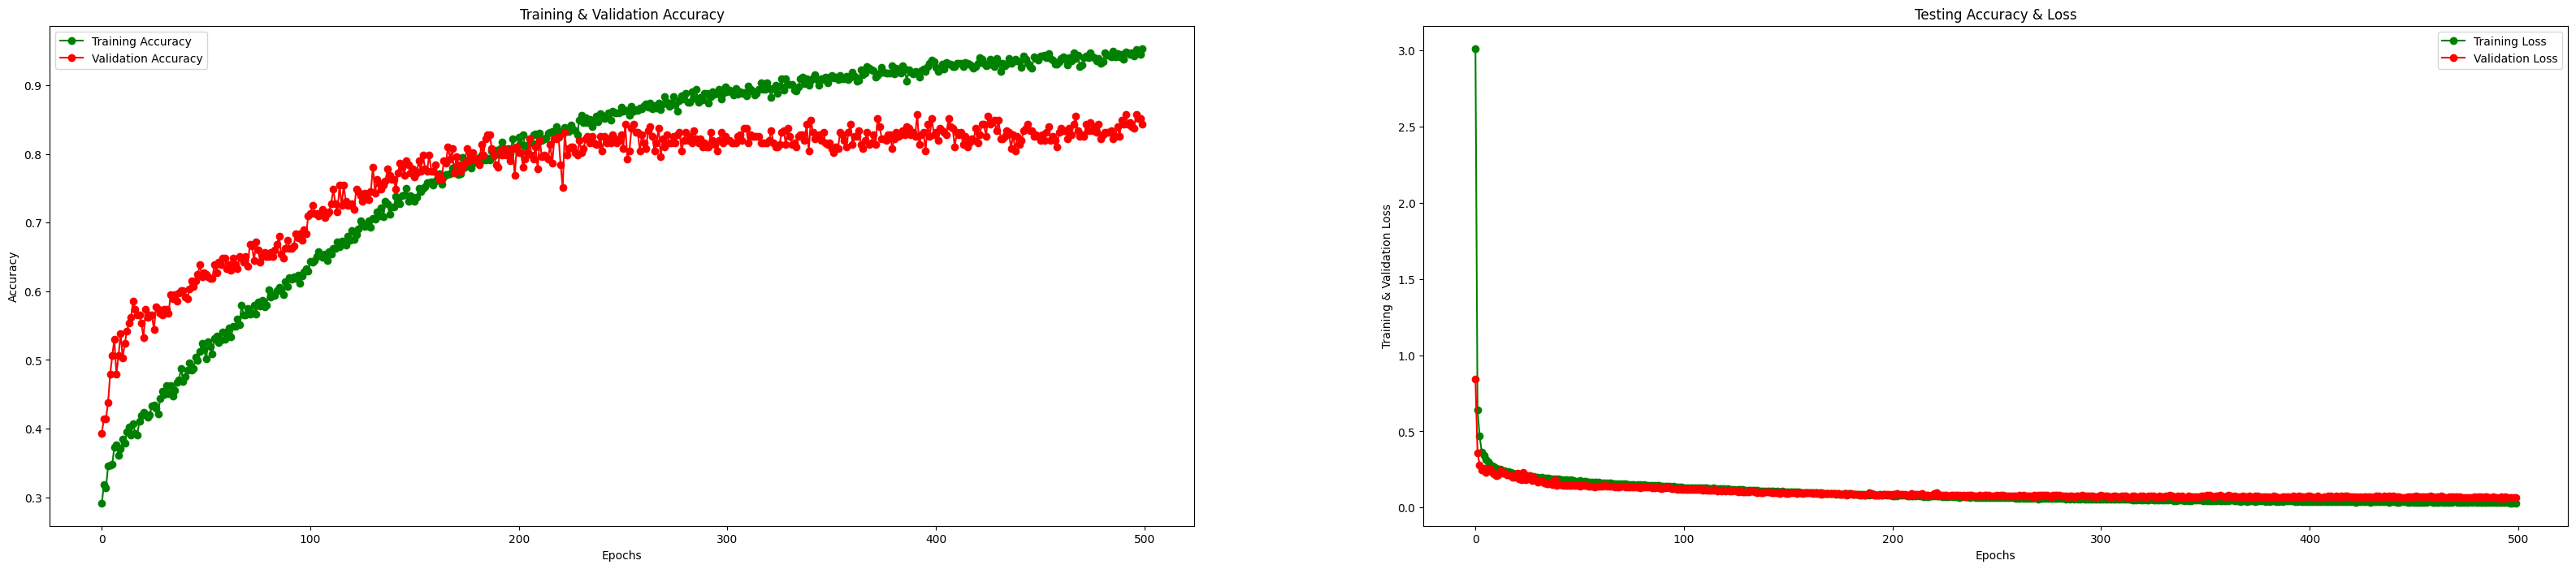

In [28]:

epochs = [i for i in range(500)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(40,8)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [29]:
test_y=np.argmax(test_y, axis=1)

In [30]:
y_pred=vit.predict(test_x)
y_pred=np.argmax(y_pred, axis=1)

27/27 [==============================] - 2s 14ms/step


In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_y,y_pred))
print(classification_report(test_y,y_pred))

[[185   1   8  10]
 [  3 204   6  11]
 [ 17   2 176  34]
 [ 13  11  25 138]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       204
           1       0.94      0.91      0.92       224
           2       0.82      0.77      0.79       229
           3       0.72      0.74      0.73       187

    accuracy                           0.83       844
   macro avg       0.83      0.83      0.83       844
weighted avg       0.83      0.83      0.83       844



Text(0.5, 1.0, 'Confusion Matrix')

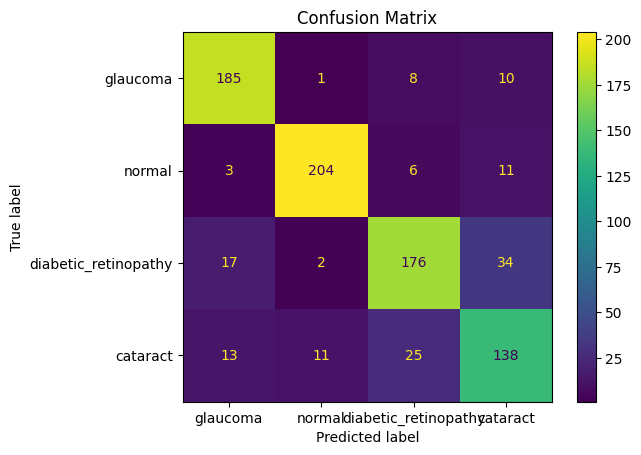

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_LR=confusion_matrix(test_y, y_pred)
cmd = ConfusionMatrixDisplay(cm_LR, display_labels=['glaucoma', 'normal', 'diabetic_retinopathy', 'cataract'])
#cmd = ConfusionMatrixDisplay(cm, display_labels=reversed_class_names)
#cmd.plot(cmap=plt.cm.Blues, values_format=".4g")  # You can customize the colormap and format

cmd.plot()
plt.title('Confusion Matrix')

In [33]:
print(create_vit_classifier)

<function create_vit_classifier at 0x7f81f5b029e0>
